In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

In [10]:
train = pd.read_csv("data/t_train.csv")
test = pd.read_csv("data/t_test.csv")

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
y = train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [13]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X)
print("Accuracy:",metrics.accuracy_score(y, predictions))

Accuracy: 0.8159371492704826


In [6]:
cats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

def getCombinations(seq):
    combinations = list()
    for i in range(0,len(seq)):
        for j in range(i+1,len(seq)):
            combinations.append([seq[i],seq[j]])
    return combinations

res = getCombinations(cats)

In [7]:
for cat in cats:
    print(cat + ": " + str(train[cat].isnull().values.any()))

Pclass: False
Sex: False
Age: True
SibSp: False
Parch: False
Fare: False
Embarked: True


In [8]:
train['Age'].fillna(train['Age'].mean(), inplace=True) # continuous values
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True) # categorical values

In [9]:
train['Age'].isnull().values.any()

False

In [10]:
train['Embarked'].isnull().values.any()

False

In [11]:
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]

In [12]:
combo = subsets(cats)
combo.pop(0)

[]

In [33]:
m = 0
res = [0, 0]
cats = []
for feature in combo:
    Y = train["Survived"]
    X = pd.get_dummies(train[feature])
    for i in range(1, 15):
        for j in range(1, 12):
            model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=1)
            x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            acc = metrics.accuracy_score(y_test, predictions)
            if acc > m:
                m = acc
                res = [i, j]
                cats = feature
print(res, m, cats)

[13, 3] 0.8880597014925373 ['Sex', 'Age', 'SibSp']


SibSp --> num sibs/spouses
parch --> parents, child

In [25]:
Y = train['Survived']
err = 100
n_iter = 100
for features in combo:
    X = pd.get_dummies(train[features])
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    clf_ = SGDRegressor(max_iter=n_iter)
    clf_.fit(x_train, y_train)
    y_pred_sksgd=clf_.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_sksgd)
    
    if err > mse:
        err = mse
        feature = features
print(err, features)

C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linea

0.13667347368192675 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\whitn\anaconda3\lib\site-packages\sklearn\linea

In [26]:
print(1 - err)

0.8633265263180733


In [28]:
acc = 0
for i in range(len(combo)):
    Y = train['Survived']
    features = combo[i]
    X = pd.get_dummies(train[features])
    classifier = SVC(kernel='rbf', random_state = 1)
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if accuracy > acc:
        acc = accuracy
        feat = features
        
print(acc, features)

0.664179104477612 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [29]:
acc = 0
for i in range(len(combo)):
    Y = train['Survived']
    features = combo[i]
    X = pd.get_dummies(train[features])
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    Y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,Y_pred)
    accuracy = float(cm.diagonal().sum())/len(y_test)
    
    if accuracy > acc:
        acc = accuracy
        feat = features
        
print(acc, features)

0.7350746268656716 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [31]:
acc = 0
for i in range(len(combo)):
    Y = train['Survived']
    features = combo[i]
    X = pd.get_dummies(train[features])
    for i in range(1, 26):
        classifier = KNeighborsClassifier(n_neighbors = i)
        classifier.fit(x_train,y_train)
        Y_pred = classifier.predict(x_test)
        cm = confusion_matrix(y_test,Y_pred)
        accuracy = float(cm.diagonal().sum())/len(y_test)
    
        if accuracy > acc:
            acc = accuracy
            feat = features
            n = i
        
print(acc, features, i)

0.7276119402985075 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 25


In [32]:
for i in range(len(combo)):
    Y = train['Survived']
    features = combo[i]
    X = pd.get_dummies(train[features])
    
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
    
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)
        
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(features)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

ValueError: in user code:

    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\whitn\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 2), found shape=(None, 3)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


NameError: name 'names' is not defined

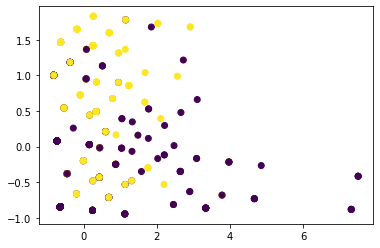

In [14]:
pca = PCA()
Xt = pca.fit_transform(X)
y = train['Survived']
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=names)
plt.show()